# DataFrames generated

The following notebook shows how the dataframe evolved when passing through the pipelines


In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import re
import squarify

import matplotlib.pyplot as plt
import matplotlib

#Config metaplotlib
matplotlib.rcParams.update({'font.size': 20 }) #, 'font.weight' : 'bold'})
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

!pwd

pd.set_option('display.max_columns', None)

/Users/fruiz/Desktop/github/papers-stackage/pipelines/dataframes


In [9]:
df_test_with_path = pd.read_pickle("package-dataframe-2020-11-19-00-01-24-with-paths.df")
df_test_with_path

,package,version,stability,cabal-file,categories,deps,provided-modules,src-dirs,main-modules,mtl-direct,provided-modules-found,provided-modules-notfound,main-modules-found,main-modules-notfound
AC-Vector-2.3.2,AC-Vector,2.3.2,experimental,/Users/fruiz/Desktop/github/papers-stackage/pi...,"[graphics, math, numerical, data]",[base],"[Data.BoundingBox.B1, Data.BoundingBox.B2, Dat...",[.],[],0,"[(Data.BoundingBox.B1, ./StackageDownload/lts-...",[],[],[]
BlastHTTP-1.0.1,BlastHTTP,1.0.1,,/Users/fruiz/Desktop/github/papers-stackage/pi...,[bioinformatics],"[http, base, biocore, blastxml, bytestring, co...",[Bio.BlastHTTP],[src],[],1,"[(Bio.BlastHTTP, ./StackageDownload/lts-0.7/Bl...",[],[],[]
BlogLiterately-0.7.1.7,BlogLiterately,0.7.1.7,experimental,/Users/fruiz/Desktop/github/papers-stackage/pi...,[web],"[blogliterately, haxml, base, base, blaze-html...","[Paths_BlogLiterately, Text.BlogLiterately, Te...","[main, src]",[BlogLiterately.hs],1,"[(Text.BlogLiterately, ./StackageDownload/lts-...",[],[./StackageDownload/lts-0.7/BlogLiterately/Blo...,[]
BlogLiterately-diagrams-0.1.4.3,BlogLiterately-diagrams,0.1.4.3,,/Users/fruiz/Desktop/github/papers-stackage/pi...,[web],"[blogliterately, blogliterately-diagrams, base...",[Text.BlogLiterately.Diagrams],"[src, src/tools]",[BlogLiteratelyD.hs],0,"[(Text.BlogLiterately.Diagrams, ./StackageDown...",[],[./StackageDownload/lts-0.7/BlogLiterately-dia...,[]
Boolean-0.2.3,Boolean,0.2.3,experimental,/Users/fruiz/Desktop/github/papers-stackage/pi...,[data],[base],"[Data.Boolean, Data.Boolean.Numbers, Data.Bool...",[src],[],0,"[(Data.Boolean, ./StackageDownload/lts-0.7/Boo...",[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zip-archive-0.2.3.5,zip-archive,0.2.3.5,,/Users/fruiz/Desktop/github/papers-stackage/pi...,[codec],"[array, base, binary, bytestring, digest, dire...",[Codec.Archive.Zip],"[., src]",[Zip.hs],1,"[(Codec.Archive.Zip, ./StackageDownload/lts-0....",[],[./StackageDownload/lts-0.7/zip-archive/zip-ar...,[]
zlib-0.5.4.2,zlib,0.5.4.2,,/Users/fruiz/Desktop/github/papers-stackage/pi...,[codec],"[base, bytestring]","[Codec.Compression.GZip, Codec.Compression.Zli...",[],[],0,"[(Codec.Compression.GZip, ./StackageDownload/l...",[],[],[]
zlib-bindings-0.1.1.5,zlib-bindings,0.1.1.5,experimental,/Users/fruiz/Desktop/github/papers-stackage/pi...,[codec],"[base, bytestring, zlib]","[Codec.Zlib, Codec.Zlib.Lowlevel]",[],[],0,"[(Codec.Zlib, ./StackageDownload/lts-0.7/zlib-...",[],[],[]
zlib-enum-0.2.3.1,zlib-enum,0.2.3.1,experimental,/Users/fruiz/Desktop/github/papers-stackage/pi...,"[compression, enumerator, codec]","[base, bytestring, enumerator, transformers, z...",[Codec.Zlib.Enum],[],[test.hs],0,"[(Codec.Zlib.Enum, ./StackageDownload/lts-0.7/...",[],[./StackageDownload/lts-0.7/zlib-enum/zlib-enu...,[]


### Step 0

Runnig the `P0_create_package_catalog.py` pipeline we generate the package catalog csv file called `packages-catalog-{date}.csv` that contains the data such as its category, version or modules provided, these are obtained from the `{package}.cabal` file of each package.

### Step 1

Runnig the `P1_construct_initial_dataframe.py` pipeline we generate the first DataFrame called `package-dataframe-{date}.df` which structures the information from the CSV file previously generated.

In [10]:
df_p1 = pd.read_pickle('package-dataframe-2020-11-06-04-08-03.df')
df_p1.head(2)

,package,version,stability,cabal-file,categories,deps,provided-modules,src-dirs,main-modules,mtl-direct
AC-Angle-1.0,AC-Angle,1.0,experimental,/Users/fruiz/Desktop/github/papers-stackage/pi...,"[math, numerical, data]",[base],[Data.Angle],[.],[],0
ALUT-2.4.0.3,ALUT,2.4.0.3,,/Users/fruiz/Desktop/github/papers-stackage/pi...,[sound],"[alut, openal, statevar, base, pretty, transfo...","[Sound.ALUT, Sound.ALUT.Config, Sound.ALUT.Con...","[examples/Basic, examples/TestSuite, src]","[HelloWorld.hs, OpenALInfo.hs, PlayFile.hs, Te...",0


### Step 2

Runnig the `P2_construct_dataframe_with_paths.py` pipeline we add the paths of modules provided by the package to the DataFrame called `package-dataframe-{date}-with-paths.df`

In [11]:
df_p2 = pd.read_pickle('package-dataframe-2020-11-06-04-08-03-with-paths.df')
df_p2.iloc[1]

FileNotFoundError: [Errno 2] No such file or directory: 'package-dataframe-2020-11-06-04-08-03-with-paths.df'

### Step 3

Runnig the `P3_construct_dataframe_with_imports.py` -> `package-dataframe-{date}-with-paths-with-imports.df`

In [12]:
df_p3 = pd.read_pickle('package-dataframe-2020-11-06-04-08-03-with-paths-with-imports.df')
df_p3.iloc[3]['imported-modules']

['["/Users/fruiz/Desktop/github/papers-stackage/pipelines/scripts/StackageDownload/Allure/Allure-0.9.5.0/Allure.cabal"',
 '"./StackageDownload/Allure/Allure-0.9.5.0/GameDefinition/game-src/Client/UI/Content/Input.hs"',
 '"./StackageDownload/Allure/Allure-0.9.5.0/GameDefinition/game-src/Client/UI/Content/Screen.hs"',
 '"./StackageDownload/Allure/Allure-0.9.5.0/GameDefinition/Content/CaveKind.hs"',
 '"./StackageDownload/Allure/Allure-0.9.5.0/GameDefinition/Content/ItemKind.hs"',
 '"./StackageDownload/Allure/Allure-0.9.5.0/GameDefinition/Content/ItemKindActor.hs"',
 '"./StackageDownload/Allure/Allure-0.9.5.0/GameDefinition/Content/ItemKindBlast.hs"',
 '"./StackageDownload/Allure/Allure-0.9.5.0/GameDefinition/Content/ItemKindEmbed.hs"',
 '"./StackageDownload/Allure/Allure-0.9.5.0/GameDefinition/Content/ItemKindOrgan.hs"',
 '"./StackageDownload/Allure/Allure-0.9.5.0/GameDefinition/Content/ItemKindTemporary.hs"',
 '"./StackageDownload/Allure/Allure-0.9.5.0/GameDefinition/Content/ModeKind.hs"

### Step 4

Runnig the `P4_construct_dataframe_with_mtl_usage.py` -> [`package-dataframe-{data}-with-paths-with-imports-with-monad-usage.df` - `package-dataframe-{date}-with-paths-with-imports-with-monad-usage-by-category.df`]

In [13]:
df_p4 = pd.read_pickle('package-dataframe-2020-11-06-04-08-03-with-paths-with-imports-with-monad-usage.df')
df_p4.iloc[1]

package                                                                     ALUT
version                                                                  2.4.0.3
stability                                                                       
cabal-file                     /Users/fruiz/Desktop/github/papers-stackage/pi...
categories                                                               [sound]
deps                           [alut, openal, statevar, base, pretty, transfo...
provided-modules               [Sound.ALUT, Sound.ALUT.Config, Sound.ALUT.Con...
src-dirs                               [examples/Basic, examples/TestSuite, src]
main-modules                   [HelloWorld.hs, OpenALInfo.hs, PlayFile.hs, Te...
mtl-direct                                                                     0
provided-modules-found         [(Sound.ALUT, ./StackageDownload/ALUT/ALUT-2.4...
provided-modules-notfound                                                     []
main-modules-found          

In [14]:
df_p5 = pd.read_pickle('package-dataframe-2020-11-06-04-08-03-with-paths-with-imports-with-monad-usage-by-category.df')
df_p5.head(2)

,package,version,stability,cabal-file,category,deps,provided-modules,src-dirs,main-modules,mtl-direct,provided-modules-found,provided-modules-notfound,main-modules-found,main-modules-notfound,imported-modules,Control.Monad.Cont,Control.Monad.Cont.Class,Control.Monad.Error,Control.Monad.Error.Class,Control.Monad.Except,Control.Monad.Identity,Control.Monad.List,Control.Monad.RWS,Control.Monad.RWS.Class,Control.Monad.RWS.Lazy,Control.Monad.RWS.Strict,Control.Monad.Reader,Control.Monad.Reader.Class,Control.Monad.State,Control.Monad.State.Class,Control.Monad.State.Lazy,Control.Monad.State.Strict,Control.Monad.Trans,Control.Monad.Writer,Control.Monad.Writer.Class,Control.Monad.Writer.Lazy,Control.Monad.Writer.Strict,Control.Monad,System.IO
AC-Angle-1.0,AC-Angle,1.0,experimental,/Users/fruiz/Desktop/github/papers-stackage/pi...,math,[base],[Data.Angle],[.],[],0,"[(Data.Angle, ./StackageDownload/AC-Angle/AC-A...",[],[],[],"[[""/Users/fruiz/Desktop/github/papers-stackage...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC-Angle-1.0,AC-Angle,1.0,experimental,/Users/fruiz/Desktop/github/papers-stackage/pi...,data,[base],[Data.Angle],[.],[],0,"[(Data.Angle, ./StackageDownload/AC-Angle/AC-A...",[],[],[],"[[""/Users/fruiz/Desktop/github/papers-stackage...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Test

In [15]:
def import_mtl_directly(df):
    return df[df['mtl-direct'] == 1]

import_mtl_directly(df_p4).iloc[1]


# extension 1: Las funciones que son declaradas en el modulo (nombre y tipo) keyword: ast decl
# extension 2: Que funciones son invocadas

# extension 3: declaracion de nuevas type class
# extension 4: declaracion de nuevas intancias de type class
    

package                                                                 ChannelT
version                                                                  0.0.0.7
stability                                                                       
cabal-file                     /Users/fruiz/Desktop/github/papers-stackage/pi...
categories                       [enumerator, iteratee, pipes, proxies, control]
deps                                [base, free, mmorph, mtl, transformers-base]
provided-modules               [Control.Monad.Channel, Control.Monad.Channel....
src-dirs                                                                   [src]
main-modules                                                                  []
mtl-direct                                                                     1
provided-modules-found         [(Control.Monad.Channel, ./StackageDownload/Ch...
provided-modules-notfound                                                     []
main-modules-found          

# Global statistics

In [30]:
total_pkgs = len(df_p4)
total_pkgs_mtl = len(import_mtl_directly(df_p4))
per_pkgs_mtl = total_pkgs_mtl * 100 / total_pkgs

print(f'Total packages = {total_pkgs}')
print(f'Total packages using mtl directly = {total_pkgs_mtl}')
print(f'Percentage of packges using mtl directly = {per_pkgs_mtl:.2f}%')

Total packages = 2456
Total packages using mtl directly = 375
Percentage of packges using mtl directly = 15.27%


# Distribution of specific modules for each notion of computation.

In [31]:
cont_mods   = ("Continuation", ["Control.Monad.Cont", "Control.Monad.Cont.Class"])
error_mods  = ("Error", ["Control.Monad.Error", "Control.Monad.Error.Class"])
reader_mods = ("Reader", ["Control.Monad.Reader", "Control.Monad.Reader.Class"])
writer_mods = ("Writer", ["Control.Monad.Writer", "Control.Monad.Writer.Class", "Control.Monad.Writer.Lazy", "Control.Monad.Writer.Strict"])
state_mods  = ("State", ["Control.Monad.State", "Control.Monad.State.Class", "Control.Monad.State.Lazy", "Control.Monad.State.Strict"])
rws_mods    = ("RWS", ["Control.Monad.RWS", "Control.Monad.RWS.Class", "Control.Monad.RWS.Lazy", "Control.Monad.RWS.Strict"])

except_mods = ("Except", ["Control.Monad.Except"])
ident_mods  = ("Identity", ["Control.Monad.Identity"])
list_mods   = ("List", ["Control.Monad.List"])
trans_mods  = ("Trans", ["Control.Monad.Trans"]) #, "Control.Monad.Trans.Class"])

monads_defs = [cont_mods, error_mods, rws_mods, reader_mods, writer_mods, state_mods]

In [45]:
def generateMonadDataframes(theDf):
    monad_dfs  = {}    
    for mdef in monads_defs:        
        monad_name    = mdef[0]
        monad_details = theDf[mdef[1]].sum()
        monad_dfs[monad_name] = pd.DataFrame(columns = mdef[1])
        monad_dfs[monad_name] = pd.concat([monad_dfs[monad_name], monad_details.to_frame().T])
        monad_dfs[monad_name].index = ["Total"]
        
    return monad_dfs

mtl_df = import_mtl_directly(df_p4)
mdfs = generateMonadDataframes(mtl_df)

In [46]:
split_df = pd.DataFrame(columns = ["Top-level Module", "Class Module", "Lazy Variant", "Strict Variant"])

for key in mdfs:    
    topLevel      = mdfs[key].iloc[0][0]
    classLevel    = mdfs[key].iloc[0][1]
    lazyVariant   = 0
    strictVariant = 0
    if key in ["RWS", "Writer", "State"]:
        lazyVariant   = mdfs[key].iloc[0][2]
        strictVariant = mdfs[key].iloc[0][3]
    
    split_df.loc[key] = [topLevel, classLevel, lazyVariant, strictVariant]   

split_df

,Top-level Module,Class Module,Lazy Variant,Strict Variant
Continuation,14,15,0,0
Error,14,43,0,0
RWS,14,12,11,12
Reader,128,34,0,0
Writer,36,26,14,14
State,98,35,21,62


<AxesSubplot:>

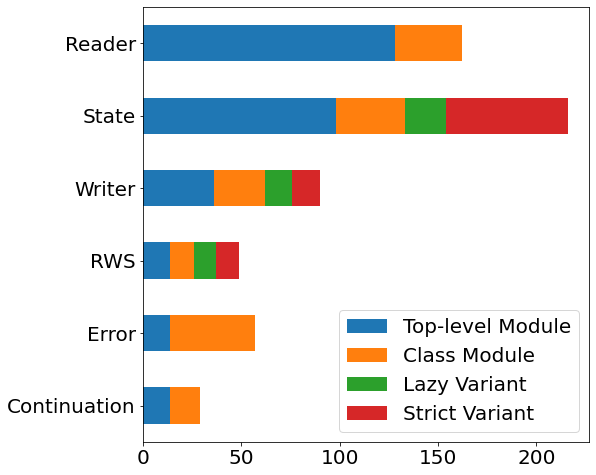

In [47]:
ax = plt.figure(figsize=(8,8)).add_subplot(111)
dfy = split_df.sort_values(by="Top-level Module")
dfy.plot(ax=ax, kind='barh', stacked=True, legend=True)

In [48]:
pre_ranking = mtl_df['MonadsUsedVector'].value_counts().to_frame("Total Frequency")
pre_ranking.index = map(usageCombinationToString, pre_ranking.index)
pre_ranking

KeyError: 'MonadsUsedVector'